# INTRODUCTION TO THE SYMPY MODULE

In [2]:
import sympy as smp, numpy as np, matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

## SECTION 1: SYMBOLS, FACTORIZATION AND SOLVING

### SYMBOLS, FACTORING AND EXPANDING

In [4]:
x = smp.symbols('x')
y = smp.sin(x)
z = y - x ** 2

In [13]:
z

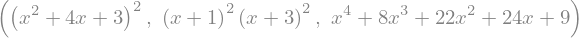

In [15]:
w = (x ** 2 + 4 * x + 3) ** 2
w, w.factor(), w.expand()

### MULTIVARIABLE EXPRESSIONS

In [6]:
x, y, z = smp.symbols('x y z')
F = smp.sin(z) * y + x ** 2
F

x**2 + y*sin(z)

In [7]:
smp.solve(F, x), smp.solve(F, y), smp.solve(F, z)

([-sqrt(-y*sin(z)), sqrt(-y*sin(z))],
 [-x**2/sin(z)],
 [asin(x**2/y) + pi, -asin(x**2/y)])

### CONVERTING SYMBOLIC RESULTS TO NUMERIC ONES

In [8]:
expr_f = smp.lambdify([x, y], smp.solve(F, z)[0])
expr_f(1,2)

3.6651914291880923

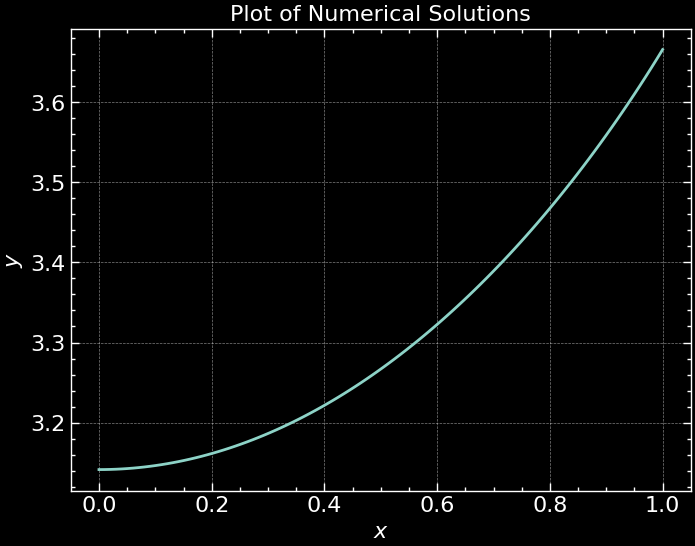

(x**2 + y*sin(z), x**2)

In [9]:
x_num = np.linspace(0, 1, 100)
y_num = 2

plt.plot(x_num, expr_f(x_num, y_num))
plt.title('Plot of Numerical Solutions')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

f = smp.sin(z) * y + x ** 2
f, f.subs([(y, smp.cos(z)), (z, smp.pi / 2)])

### PROBLEM 1: A FALLING OBJECT ENCOUNTERS AN UPWARDS-ACCELERATING PLATFORM

1. Object: $\displaystyle h_0(t)=h_0-v_0t-\frac{1}{2}gt^2$
2. Platform: $\displaystyle h_p(t)=v_p(t)+\frac{1}{2}At^2$
- Find the Initial Velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.
- We need to solve for the equations $h_0(t)=h_p(t)$ and $\frac{dh_0}{dt}=-\frac{dh_p}{dt}$

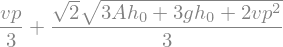

In [31]:
t, h0, v0, g, vp, A = smp.symbols('t h0 v0 g vp A', real = True, positive = True)

h0_t = h0 - v0 * t - smp.Rational(1, 2) * g * t ** 2
hp_t = vp * t + smp.Rational(1, 2) * A * t ** 2

dh0_dt = g * t - v0
dhp_dt = vp + A * t

t_collide, v_init = smp.solve([h0_t - hp_t, dh0_dt + dhp_dt], [t, v0])[0]
v_init

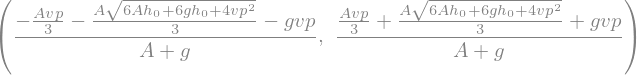

In [34]:
# VELOCITIES OF THE OBJECT AND PLATFORM ARE EQUAL AND OPPOSITE:

dh0_dt.subs([(t, t_collide), (v0, v_init)]).simplify(), dhp_dt.subs(
    [(t, t_collide), (v0, v_init)]).simplify()

## SECTION 2: SINGLE-VARIABLE CALCULUS

### LIMITS AND DERIVATIVES

In [35]:
x = smp.symbols('x')
t = smp.symbols('t')

$\displaystyle \lim_{x \to \pi}\,\, \bigg \{ \sin \bigg ({\frac{x}{2+\sin x}}\bigg) \bigg \}$

In [36]:
smp.limit(smp.sin(x / 2 + smp.sin(x)), x, smp.pi)

$\displaystyle \frac{d}{dx}\,\frac{1+\sin x}{(1-\cos x)^2}$

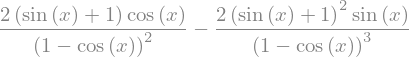

In [37]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x))) ** 2, x)

In [38]:
# DERIVTIVES OF COMPOSITE FUNCTIONS

f, g = smp.symbols('f g', cls = smp.Function)
g = g(x)
f = f(x + g)

f, g

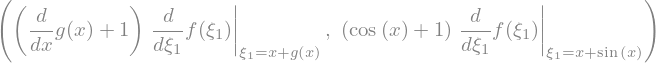

In [40]:
dfdx = smp.diff(f, x)
dfdx, dfdx.subs([(g, smp.sin(x))]).doit()

### BASIC INDEFINITE AND DEFINITE ANTIDERIVATIVES:

$\int \csc(x) \cot(x)\,dx$

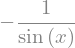

In [41]:
smp.integrate(smp.csc(x) * smp.cot(x), x)

$\displaystyle \int_0^{log(4)} \frac{e^{x}}{\sqrt{e^{2x}+9}}\,dx$

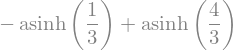

In [42]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2 * x) + 9), (x, 0, smp.log(4)))

$\displaystyle \int_1^{t} x^{10} e^x\,dx$

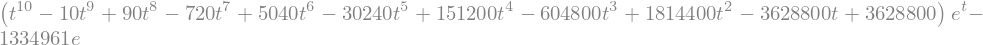

In [43]:
smp.integrate(x ** 10 * smp.exp(x), (x, 1, t))

### PROBLEM 2: COMPUTING THE MEAN DISTANCE OF AN ELECTRON FROM A HYDROGEN NUCLEUS

The Hydrogen Wavefunction is given by $\displaystyle \psi_{nlm} = R_{nl}(r)Y_{l}^{m}(\theta, \phi)$ $$R_{nl}(r)=\sqrt{\bigg ( \frac{2}{na}\bigg )^3 \frac{(n-l-1)!}{2n(n+1)!}}e^{(-r/na)}\bigg (\frac{2r}{na} \bigg )^l \big [L_{n-l-1}^{2l+1}\,(2r/na)\big ]$$
1. The Mean Distance from the nucleus is $$\displaystyle \langle r \rangle=\int_0^\infty R_{nl}^2r^3\,dr$$
2. The Spread in the distances from the nucleus is $$\displaystyle \sigma=\sqrt{\langle r^2 \rangle-{\langle r \rangle}^2}$$

In [2]:
from sympy import assoc_laguerre

In [6]:
r, a = smp.symbols('r a', real = True, positive = True)
n, l = smp.symbols('n l', integer = True, positive = True)

R = smp.sqrt((2 / (n * a)) ** 3 * smp.factorial(n - l - 1) / (2 * n * (smp.factorial(n + l)))) \
    * smp.exp(-r / (n * a)) * (2 * r / (n * a)) ** l * assoc_laguerre(n - l - 1, 2 * l + 1, (2 * r / (n * a)))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

In [7]:
R.subs([(n,1),(l,0)])

2*exp(-r/a)/a**(3/2)

In [8]:
def compute_int(n_val, l_val, k):
    R_nl = R.subs([(n, n_val), (l, l_val)])
    return smp.integrate(R_nl ** 2 * r ** k, (r, 0, smp.oo))


Mean Radial Distance of an electron in the Ground State $\psi_{100}$:

In [9]:
compute_int(n_val = 1, l_val = 0, k = 3)

3*a/2

Spread (Standard Deviation) in distances in $\psi_{100}$:

In [10]:
smp.sqrt(compute_int(n_val = 1, l_val = 0, k = 4) -
         compute_int(n_val = 1, l_val = 0, k = 3) ** 2)

sqrt(3)*a/2

## SECTION 3: MULTIVARIABLE CALCULUS

### MATRICES

In [3]:
u, v, u1, u2, u3, v1, v2, v3, t = smp.symbols('u v u_1 u_2 u_3 v_1 v_2 v_3 t')

In [4]:
u = smp.Matrix([u1, u2, u3])
v = smp.Matrix([v1, v2, v3])

In [5]:
2 * u + v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

VECTOR PRODUCTS, NORMS AND PROJECTIONS

In [6]:
u.dot(v), u.cross(v), v.cross(u)

(u_1*v_1 + u_2*v_2 + u_3*v_3,
 Matrix([
 [ u_2*v_3 - u_3*v_2],
 [-u_1*v_3 + u_3*v_1],
 [ u_1*v_2 - u_2*v_1]]),
 Matrix([
 [-u_2*v_3 + u_3*v_2],
 [ u_1*v_3 - u_3*v_1],
 [-u_1*v_2 + u_2*v_1]]))

In [15]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

In [17]:
proj_vu = u.dot(v) / v.norm() ** 2 * v
proj_vu

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

### LINES AND PLANES

Line: $\vec{r} = \vec{r}_0+t\vec{u}$

In [23]:
r0 = smp.Matrix([1, 1, 1])
u = smp.Matrix([1, 3, -1])

r0 + t * u

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Plane: $\hat{n}\cdot \,(\vec{P}_0-\langle x, y, z \rangle)=0$

In [22]:
x, y, z = smp.symbols('x y z')

In [24]:
P0 = smp.Matrix([4, 4, 8])
r = smp.Matrix([x, y, z])
n = smp.Matrix([1, 1, 1])

n.dot(P0 - r)

-x - y - z + 16

### VECTOR DERIVATIVES

In [4]:
r, t = smp.symbols('r t')

In [5]:
r = smp.Matrix([3 * t, smp.sin(t), t ** 2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [6]:
smp.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

### PROBLEM 3: VELOCITIES AND ACCELERATIONS 

Find the Angle between the Velocity and the Acceleration as a function of $\theta(t)$ and find the value of $\theta$ at $t=6$.

In [8]:
v, a = smp.symbols('v a')

In [12]:
v = smp.diff(r, t)
a = smp.diff(v, t)

theta = smp.acos(v.dot(a) / (v.norm() * a.norm())).simplify()
theta 

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [13]:
theta.subs(t, 6).evalf()

0.251108015692338

### GRADIENTS 

In [27]:
from sympy.vector import *

In [28]:
C = CoordSys3D('')

In [29]:
f = C.x * smp.sin(C.y)
gradient(f).to_matrix(C)


(sin(.y))*.i + (.x*cos(.y))*.j

In [32]:
gradient(f).to_matrix(C).subs([(C.y, 1)])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

### DIRECTIONAL DERIVATIVES

$D_{\hat u}=\nabla f \cdot \hat u$

In [34]:
u = 4 * C.i - 3 * C.j + 2 * C.k
u.normalize()

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [35]:
f = C.z * smp.exp(C.y)
gradient(f).dot(u)

-3*.z*exp(.y) + 2*exp(.y)

### VECTOR INTEGRALS

In [25]:
r, t = smp.symbols('r t')

In [28]:
r = smp.Matrix([3 * t, smp.sin(t), t ** 2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [30]:
smp.Integral(r, t).doit()

Matrix([
[3*t**2/2],
[ -cos(t)],
[  t**3/3]])

### PROBLEM 4: EVALUATING ARCLENGTH

The Arclength $L$ is defined as:$$L=\int_a^b \sqrt{\big ( \frac{dx}{dt}\big )^2 +\big ( \frac{dy}{dt}\big )^2 +\big ( \frac{dz}{dt}\big )^2}\,dt$$ Find the Arclength of $\langle 0, t, t^2 \rangle$ from $t=0$ and $t=1$.

In [31]:
r = smp.Matrix([0, t, t ** 2])
smp.integrate(smp.diff(r,t).norm(), (t, 0, 1))

asinh(2)/4 + sqrt(5)/2

### PROBLEM 5: UNIT TANGENT AND NORMAL VECTORS

If $ds=\displaystyle \sqrt{{dx}^2+{dy}^2+{dz}^2}$ is the Arclength element, and $ds/dt=\sqrt{(dx/dt)^2+(dy/dt)^2+(dz/dt)^2}=\| d \vec r/dt \|=\| \vec v \|$, then:
1. Unit Tangent Vector: $\hat T=\displaystyle \frac{d \vec r}{dt} \frac{1}{\| d \vec r/dt \|}=\frac{\vec v}{\| \vec v \|}$

2. Unit Normal Vector: $\hat N=\displaystyle \frac{d \hat T/dt}{\| d \hat T/dt \|}$

- Find these for $\vec r(t)=\langle a\cos(t)e^t, b\sin(t), ct \rangle$

In [11]:
t, a, b, c, T, N = smp.symbols('t a b c T N', pos = True, real = True)

In [6]:
r = smp.Matrix([a * smp.cos(t) * smp.exp(t), b * smp.sin(t), c * t])
r

Matrix([
[a*exp(t)*cos(t)],
[       b*sin(t)],
[            c*t]])

In [14]:
v = smp.diff(r, t)

T = v / v.norm()
N = smp.diff(T, t) / smp.diff(r, t).norm()
T, N

(Matrix([
 [(-a*exp(t)*sin(t) + a*exp(t)*cos(t))/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)],
 [                            b*cos(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)],
 [                                   c/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)]]),
 Matrix([
 [(-2*a*exp(t)*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2) + (-a*exp(t)*sin(t) + a*exp(t)*cos(t))*(-2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) + b**2*sin(t)*cos(t))/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2))/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)],
 [                                      (b*(-2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) + b**2*sin(t)*cos(t))*cos(t)/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2) - b*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2))/sqrt(b**2*cos(t

### PROBLEM 6: MAGNETIC FIELD ANALYSIS

The Magnetic Field at a point $\vec r$ of a certain configuration is$$\vec B(\vec r)=\frac{\mu_0}{4\pi}\int_t \frac{I\,\frac{d \vec l}{dt}\times (\vec r - \vec l)}{\|\vec r - \vec l \|^3}\,dt$$where $\vec r=\langle x,y,z \rangle$ and $\vec l=\langle f(t),g(t),h(t) \rangle$ is a 1-D curve in space that gives the location of the wire.
- Find the Magnetic Field at a distance $H$ above a rind of radius $R$ flowing Clockwise.

In [40]:
x, y, z, t, I, mu_0, R, H = smp.symbols('x y z t I mu_0 R H', real = True)
f, g, h = smp.symbols('f g h', cls = smp.Function)

f = f(t)
g = g(t)
h = h(t)

In [43]:
r = smp.Matrix([x, y, z])
l = smp.Matrix([f, g, h])

smp.diff(l)

Matrix([
[Derivative(f(t), t)],
[Derivative(g(t), t)],
[Derivative(h(t), t)]])

In [65]:
dBdt = I  * smp.diff(l).cross(r - l) / (r-l).norm() ** 3

dBdt = dBdt.subs([(f, R * smp.cos(t)), (g, R * smp.sin(t)), (h, 0), (x, 0), (y, 0), (z, H)]).doit()
dBdt.simplify()


In [68]:
B = mu_0 / (4 * smp.pi) * smp.integrate(dBdt, [t, 0, 2 * smp.pi])
B

Matrix([
[                                   0],
[                                   0],
[I*R**2*mu_0/(2*(H**2 + R**2)**(3/2))]])

### PARTIAL DERIVATIVES

$\displaystyle f(x,y)=y^2\sin(xy)$

In [69]:
f = y ** 2 * smp.sin(x * y)
f

y**2*sin(x*y)

$\displaystyle \frac{\partial f}{\partial x}\,,\displaystyle \frac{\partial f}{\partial y}$:

In [70]:
smp.diff(f, x), smp.diff(f, y)

(y**3*cos(x*y), x*y**2*cos(x*y) + 2*y*sin(x*y))

$\displaystyle \frac{\partial^3 f}{\partial x y^2}$:

In [71]:
smp.diff(f, y, y, x)

y*(-x**2*y**2*cos(x*y) - 6*x*y*sin(x*y) + 6*cos(x*y))

### MULTIVARIABLE CHAIN RULE

In [75]:
x, y, z, w, v = smp.symbols('x y z w v', cls = smp.Function)

In [76]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

smp.diff(w, t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

In [77]:
w0 = smp.exp(y) * smp.sin(z) + x ** 2
smp.diff(w0, t).subs([(x, smp.sin(t)), (y, smp.cos(t)), (z, t ** 2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

### MULTIPLE INTEGRALS

$\displaystyle \int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} x\,dzdydx $

In [78]:
x, y, z = smp.symbols('x y z')
f = x

smp.integrate(f, (z, 3, 4 - x ** 2 - y ** 2), (y, 0, 1 - x ** 2), (x, 0, 1))

1/8

### EXTREME VALUES AND SADDLE POINTS

Extreme values of a function $f(x,y)$ can occur at
1. The Boundary Points on its Domain
2. Critical Points: $f_x=f_y=0$
If:
- I) $f_{xx}<0$ and $f_{xx}f_{yy}-f^2_{xy}>0$ at $(a,b)$ then $(a,b)$ is a Local Maximum.
- II) $f_{xx}>0$ and $f_{xx}f_{yy}-f^2_{xy}>0$ at $(a,b)$ then $(a,b)$ is a Local Minimum.
- III) $f_{xx}f_{yy}-f^2_{xy}<0$ at $(a,b)$ then $(a,b)$ is a Saddle Point.
- IV) $f_{xx}f_{yy}-f^2_{xy}=0$ then the nature of $(a,b)$ is Inconclusive.

In [19]:
x, y = smp.symbols('x y')

f = x ** 3 + 3 * x * y + y ** 3
f

x**3 + 3*x*y + y**3

In [20]:
smp.solve([smp.diff(f, x), smp.diff(f, y)])

[{x: -1, y: -1},
 {x: 0, y: 0},
 {x: -(1/2 - sqrt(3)*I/2)**2, y: 1/2 - sqrt(3)*I/2},
 {x: -(1/2 + sqrt(3)*I/2)**2, y: 1/2 + sqrt(3)*I/2}]

In [21]:
f_xx, f_yy, f_xy = smp.diff(f, x, x), smp.diff(f, y, y), smp.diff(f, x, y)

Testing $(a,b)=(-1,-1)$:

In [24]:
f_xx.subs([(x, -1), (y, -1)])

-6

In [25]:
(f_xx * f_yy - f_xy ** 2).subs([(x, -1), (y, -1)])

27

Hence, $(a,b)=(-1,-1)$ is a Local Maximum.

### PROBLEM 7: LAGRANGE MULTIPLIERS

Minimizr $f(x,y,z)$ subject to the constraint $g(x,y,z)=0$ by solving:
- $\nabla f=\lambda \nabla g$
- $g(x,y,z)=0$.

A Space Probe assumes the shape of an Ellipsoid $4x^2+y^2+4z^2=16$ and the Temperature on its surface is given by $T(x,y,z)=8x^2+4yz-16z+600$. Find the maxima of the Surface Temperature.

In [46]:
C = CoordSys3D('')

In [48]:
lam = smp.symbols('\lambda')

g = 4 * C.x ** 2 + C.y ** 2 + 4 * C.z ** 2 - 16
f = 8 * C.x ** 2 + 4 * C.y * C.z - 16 * C.z + 600

In [49]:
eq1 = gradient(f) - lam * gradient(g)
eq1 = eq1.to_matrix(C)

eq2 = g

In [50]:
sols = smp.solve([eq1, eq2])
sols

[{.x: -4/3, .y: -4/3, .z: -4/3, \lambda: 2},
 {.x: 0, .y: -2, .z: -sqrt(3), \lambda: sqrt(3)},
 {.x: 0, .y: -2, .z: sqrt(3), \lambda: -sqrt(3)},
 {.x: 0, .y: 4, .z: 0, \lambda: 0},
 {.x: 4/3, .y: -4/3, .z: -4/3, \lambda: 2}]

In [51]:
for sol in sols:
    print(f.subs(sol).evalf())

642.666666666667
641.569219381653
558.430780618347
600.000000000000
642.666666666667


### PROBLEM 8: LINE INTEGRALS: SCALAR AND VECTOR FORMS

Part 1: Scalar Line Integral

Given $\vec r=\langle g(t),h(t),k(t) \rangle$, the Line Integral of $f(x,y,z)$ along the curve $C$ is $$\int_C f(x,y,z)\,ds=\int_a^b f(g(t),h(t),k(t))\,\| d\vec r/dt \|\,dt$$ 

Compute it for
- $\vec r(t)=\langle \cos(t),\sin(t),t \rangle$
- $f(x,y,z)=2xy+\sqrt z$

In [52]:
t = smp.symbols('t')
x, y, z, f = smp.symbols('x y z f', cls = smp.Function, real = True)

x, y, z = x(t), y(t), z(t)
r = smp.Matrix([x, y, z])
f = f(x, y, z)

In [53]:
integrand = f * smp.diff(r, t).norm()
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

In [61]:
integrand = integrand.subs([(f, 2 * x * y + smp.sqrt(z)), (x, smp.cos(t)), (y, smp.sin(t)), (z, t)]).doit().simplify()
smp.integrate(integrand, (t, 0, 2 * smp.pi))

8*pi**(3/2)/3

Part 2: Vector Line Integral

Given $vec r(t)=\langle g(t),h(t),k(t) \rangle$, the Line Integral of $\vec F(x,y,z)$ along the curve $C$ is $$\int_C \vec F(x,y,z) \cdot d\vec r=\int_a^b \vec F(g(t),h(t),k(t))\cdot \frac{d\vec r}{dt}\,dt$$ 
Compute it for
- $\vec r= \langle t,t^2,t^4 \rangle$ from $t=0$ to $t=1$
- $\vec F(t)=\langle \sqrt z,-2x,\sqrt y \rangle$

In [62]:
t = smp.symbols('t', real = True)
x, y, z, F1, F2, F3 = smp.symbols('x y z F1 F2 F3', cls = smp.Function, real = True)

x, y, z = x(t), y(t), z(t)
F1, F2, F3 = F1(x, y, z), F2(x, y, z), F3(x, y, z)

r = smp.Matrix([x, y, z])
F = smp.Matrix([F1, F2, F3])

In [63]:
integrand = F.dot(smp.diff(r, t))
integrand

F1(x(t), y(t), z(t))*Derivative(x(t), t) + F2(x(t), y(t), z(t))*Derivative(y(t), t) + F3(x(t), y(t), z(t))*Derivative(z(t), t)

In [65]:
integrand = integrand.subs([(F1, smp.sqrt(z)), (F2, -2 * x), (F3, smp.sqrt(y)), (x, t), (y, t ** 2), (z, t ** 4)]).doit().simplify()
smp.integrate(integrand, (t, 0, 1))

-1/5

### PROBLEM 9: SURFACE INTEGRALS: SCALAR AND VECTOR FORMS

Part 1: Scalar Surface Integral

The Area of a Surface $S$ parameterized by $\vec r(u,v)$ is given by $$A=\iint_S \bigg \| \frac{d\vec r}{du} \times \frac{d\vec r}{dv} \bigg \|\,dudv$$ The Surface Integral of a Scalar function $G(\vec r)$ is given by $$\iint_S G(\vec r(u,v))\bigg \| \frac{d\vec r}{du} \times \frac{d\vec r}{dv} \bigg \|\,dudv$$

Compute this for a 2-D Parabola: $\vec r(x,y)=\langle x,y,x^2+y^2 \rangle$ and thus, $\vec r(\rho,\theta)=\langle \rho \cos \theta, \rho \sin \theta, \rho^2 \rangle$
- Suppose that the Surface Density is gievn by $G(x,y,z)=x^2+y^2$.
- Boundary Conditions: $0<\rho <1$ and $0<\theta <2\pi$

In [6]:
rho, theta = smp.symbols(r'\rho \theta', pos = True, real = True)
x, y, z, G = smp.symbols('x y z G', cls = smp.Function, real = True)

x, y, z = x(rho, theta), y(rho, theta), z(rho, theta)
G = G(x, y, z)

r = smp.Matrix([x, y, z])

In [8]:
integrand = G * smp.diff(r, rho).cross(smp.diff(r, theta)).norm()
integrand

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)*G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [11]:
integrand = integrand.subs([(G, x ** 2 + y ** 2), (x, rho * smp.cos(theta)), (y, rho * smp.sin(theta)), (z, rho ** 2)]).doit().simplify()
smp.integrate(integrand, (rho, 0, 1), (theta, 0, 2 * smp.pi))

2*pi*(1/120 + 5*sqrt(5)/24)

Part 2: Vector Surface Integral

The Surface Integral of a Vector function $\vec G(\vec r)$ , or its Flux, is given by $$\iint_S \vec G(\vec r(u,v)) \cdot \bigg ( \frac{d\vec r}{du} \times \frac{d\vec r}{dv} \bigg )\,dudv$$

Compute this for half the surface of a 2-D Parabola: $\vec r(x,y)=\langle x,y,x^2+y^2 \rangle$ and thus, $\vec r(\rho,\theta)=\langle \rho \cos \theta, \rho \sin \theta, \rho^2 \rangle$.
- Suppose that the Vector Field $\vec G(x,y,z)$ is given by $\vec G(x,y,z)=\langle y^2,z,0 \rangle$
- Boundary Conditions: $0<\rho <1$ and $0<\theta <\pi$

In [12]:
rho, theta = smp.symbols(r'\rho \theta', pos = True, real = True)
x, y, z, G1, G2, G3 = smp.symbols('x y z G1 G2 G3', cls = smp.Function, real = True)

x, y, z = x(rho, theta), y(rho, theta), z(rho, theta)
G1 = G1(x, y, z)
G2 = G2(x, y, z)
G3 = G3(x, y, z)

r = smp.Matrix([x, y, z])
G = smp.Matrix([G1, G2, G3])

In [13]:
integrand = G.dot(smp.diff(r, rho).cross(smp.diff(r, theta)))
integrand

(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))*G3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (-Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) + Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [15]:
integrand = integrand.subs([(G1, y ** 2), (G2, z), (G3, 0), (x, rho * smp.cos(theta)), (y, rho * smp.sin(theta)), (z, rho ** 2)]).doit().simplify()
smp.integrate(integrand, (rho, 0, 1), (theta, 0, smp.pi))

-4/5

## SECTION 4: LAGRANGIAN MECHANICS

The Simpligied idea is that the Kinetic and Potential Energies of a system can expressed in terms of generalized coordinates: $$T=T(q,\dot q)\,\,\,\,\,\,\,\,V=V(q,\dot q)$$where $q$ could be a coordinate, angle, or whatever than makes a problem easier to solve. The Defining equation $\displaystyle L = T-V$ gives the Equations of Motion:$$\frac{dL}{dq}-\frac{d}{dt}\frac{dL}{d \dot q}=0$$

### PROBLEM 10: LAGRANGIAN EQUATIONS OF MOTION

Let $(x,y)=(z+R\sin \theta, -R\cos \theta)$ denote the Position of a Pendulum Bob of mass $m_2$ attached to and hanging below a moving car of mass $m_1$ moving back and forth along $z$. Find the Lagrangian Equations of motion.

In [85]:
x, y, t, R, g, m1, m2 = smp.symbols('x y t R g m_1 m_2')
z, theta = smp.symbols('z theta', cls = smp.Function)

z = z(t)
theta = theta(t)

In [86]:
x = z + R * smp.sin(theta)
y = - R * smp.cos(theta)

In [87]:
T1 = smp.Rational(1, 2) * m1 * smp.diff(z, t) ** 2
T2 = smp.Rational(1, 2) * m2 * (smp.diff(x, t) ** 2 + smp.diff(y, t) ** 2)

V1 = 0
V2 = m2 * g * y

L = (T1 + T2) - (V1 + V2)

In [90]:
LE1 = smp.diff(L, z) - smp.diff(smp.diff(L, smp.diff(z, t)), t)
LE2 = smp.diff(L, theta) - smp.diff(smp.diff(L, smp.diff(theta, t)), t)

In [91]:
sols = smp.solve([LE1, LE2], [smp.diff(z, t, t), smp.diff(theta, t, t)])

$\displaystyle \frac{d^2 \theta}{dt^2}$:

In [92]:
sols[smp.diff(theta, t, t)]

-R*m_2*sin(theta(t))*cos(theta(t))*Derivative(theta(t), t)**2/(R*m_1*sin(theta(t))**2 + R*m_1*cos(theta(t))**2 + R*m_2*sin(theta(t))**2) - g*m_1*sin(theta(t))/(R*m_1*sin(theta(t))**2 + R*m_1*cos(theta(t))**2 + R*m_2*sin(theta(t))**2) - g*m_2*sin(theta(t))/(R*m_1*sin(theta(t))**2 + R*m_1*cos(theta(t))**2 + R*m_2*sin(theta(t))**2)

$\displaystyle \frac{d^2z}{dt^2}$:

In [93]:
sols[smp.diff(z, t, t)]

R*m_2*sin(theta(t))**3*Derivative(theta(t), t)**2/(m_1*sin(theta(t))**2 + m_1*cos(theta(t))**2 + m_2*sin(theta(t))**2) + R*m_2*sin(theta(t))*cos(theta(t))**2*Derivative(theta(t), t)**2/(m_1*sin(theta(t))**2 + m_1*cos(theta(t))**2 + m_2*sin(theta(t))**2) + g*m_2*sin(theta(t))*cos(theta(t))/(m_1*sin(theta(t))**2 + m_1*cos(theta(t))**2 + m_2*sin(theta(t))**2)